# Analyze unit info burst ratios

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) and remotely (-r)\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
import matplotlib.pyplot as plt

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview

# This import does not seem to work - WHY? works for other DJD modules and functions - circular import?
# from djd.hmov_unit import get_tranges_hmov, _get_xptranges  

Importing l6s package.


In [3]:
%load_ext autoreload
%autoreload 2

## Get unit info df

In [4]:
# Get unit info df
unit_info = l6s_utils.get_all_unitexp_info(load_df_name='default')
unit_info

get_combined_unit_info(): Getting combined unit info.
  Loading saved unit info file: /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/units_info_20210204.csv


,m,s,e,u,s_region,e_name,osi_ctrl,osi_opto,dsi_ctrl,dsi_opto,...,fr_opto,fr_opto_sem,fr_spon_ctrl,fr_spon_ctrl_sem,fr_spon_opto,fr_spon_opto_sem,omi_stim,omi_spon,snr_opto,snr_ctrl
0,Ntsr1Cre_2019_0002,3,1,13,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ntsr1Cre_2019_0002,3,1,14,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ntsr1Cre_2019_0002,3,1,19,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ntsr1Cre_2019_0002,3,1,30,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ntsr1Cre_2019_0002,3,1,40,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,Ntsr1Cre_2020_0003,2,17,140,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,0.002993,NaN,NaN,NaN,NaN,NaN,-0.992899,NaN,NaN,NaN
2677,Ntsr1Cre_2020_0003,2,17,141,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,2.674780,NaN,NaN,NaN,NaN,NaN,-0.032479,NaN,NaN,NaN
2678,Ntsr1Cre_2020_0003,2,17,142,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,8.350580,NaN,NaN,NaN,NaN,NaN,0.182203,NaN,NaN,NaN
2679,Ntsr1Cre_2020_0003,2,17,144,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,3.041930,NaN,NaN,NaN,NaN,NaN,-0.000982,NaN,NaN,NaN


In [8]:
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'osi_ctrl', 'osi_opto', 'dsi_ctrl', 'dsi_opto', 'sbc_zscore', 'sbc', 'sbc_method', 'chirp_type', 'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto',
       'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_mean_sem', 'fr_ctrl', 'fr_ctrl_sem', 'fr_opto', 'fr_opto_sem', 'fr_spon_ctrl', 'fr_spon_ctrl_sem', 'fr_spon_opto',
       'fr_spon_opto_sem', 'omi_stim', 'omi_spon', 'snr_opto', 'snr_ctrl'],
      dtype='object')

In [5]:
# OLD
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_mean_sem', 'fr_ctrl', 'fr_ctrl_sem', 'fr_opto', 'fr_opto_sem', 'fr_spon_ctrl',
       'fr_spon_ctrl_sem', 'fr_spon_opto', 'fr_spon_opto_sem', 'OMI', 'SNR_opto', 'SNR_ctrl', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore', 'sbc_method', 'sbc', 'chirp_type',
       'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto'],
      dtype='object')

## Check burst ratios in opto vs control
NOTES
- include all duplicate expts for now

In [10]:
df = unit_info[unit_info['burst_ratio_ctrl'].notna()][['m', 's', 'u', 'burst_ratio_ctrl', 'burst_ratio_opto', 'omi_stim', 'sbc_zscore', 'e_name']]
df

,m,s,u,burst_ratio_ctrl,burst_ratio_opto,omi_stim,sbc_zscore,e_name
16,Ntsr1Cre_2019_0002,3,13,0.052185,0.187629,0.103517,3.288161,oriTun12_opto
17,Ntsr1Cre_2019_0002,3,14,0.012205,0.053588,-0.086694,7.661878,oriTun12_opto
18,Ntsr1Cre_2019_0002,3,19,0.000563,0.000000,0.192101,4.236185,oriTun12_opto
19,Ntsr1Cre_2019_0002,3,30,0.007001,0.419077,0.416186,5.810582,oriTun12_opto
20,Ntsr1Cre_2019_0002,3,40,0.012940,0.179692,0.108434,6.814885,oriTun12_opto
...,...,...,...,...,...,...,...,...
2602,Ntsr1Cre_2020_0003,2,129,0.003704,0.019444,-0.262040,NaN,chirp_opto
2604,Ntsr1Cre_2020_0003,2,141,0.050737,0.053215,0.013223,NaN,chirp_opto
2605,Ntsr1Cre_2020_0003,2,142,0.011920,0.010674,0.094540,NaN,chirp_opto
2606,Ntsr1Cre_2020_0003,2,144,0.017788,0.011672,-0.012856,NaN,chirp_opto


### Check burst ratio opto vs control against OMI

Text(0.5, 1.0, 'Burst ratio opto vs control and OMI - circle markers')

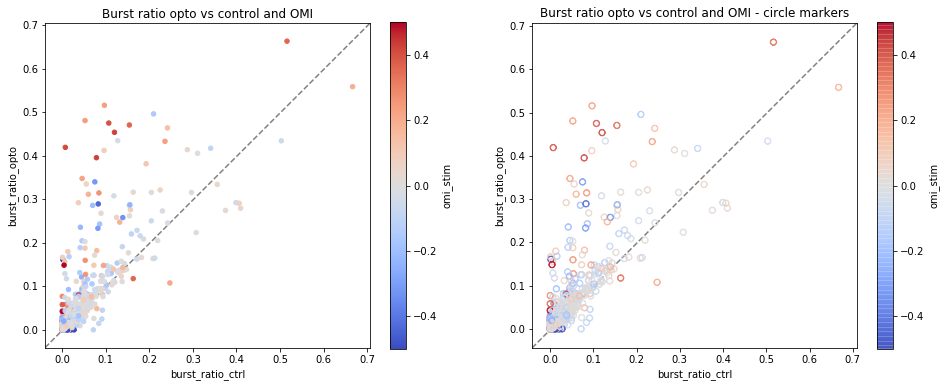

In [60]:
# Plot burst ratio opto vs control + OMIs
fig, axs = plt.subplots(1,2, figsize=(16,6))

vminmax = np.max(np.absolute(df.omi_stim.values))  # too much grey at 1
vminmax = 0.5
df.plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='omi_stim', colormap='coolwarm', vmin=-vminmax, vmax=vminmax, alpha=1, ax=axs[0]);
axs[0].set_aspect('equal')
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('Burst ratio opto vs control and OMI')

sc = df.plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='omi_stim', colormap='coolwarm', vmin=-vminmax, vmax=vminmax,
                marker='$\u25EF$', s=45, alpha=0.75, ax=axs[1]); # facecolors='none',
# sc.set_facecolor("none")
axs[1].set_aspect('equal')
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('Burst ratio opto vs control and OMI - circle markers')

### Check burst ratio opto vs control against SbC scores

Text(0.5, 1.0, 'Burst ratio control vs SbC score')

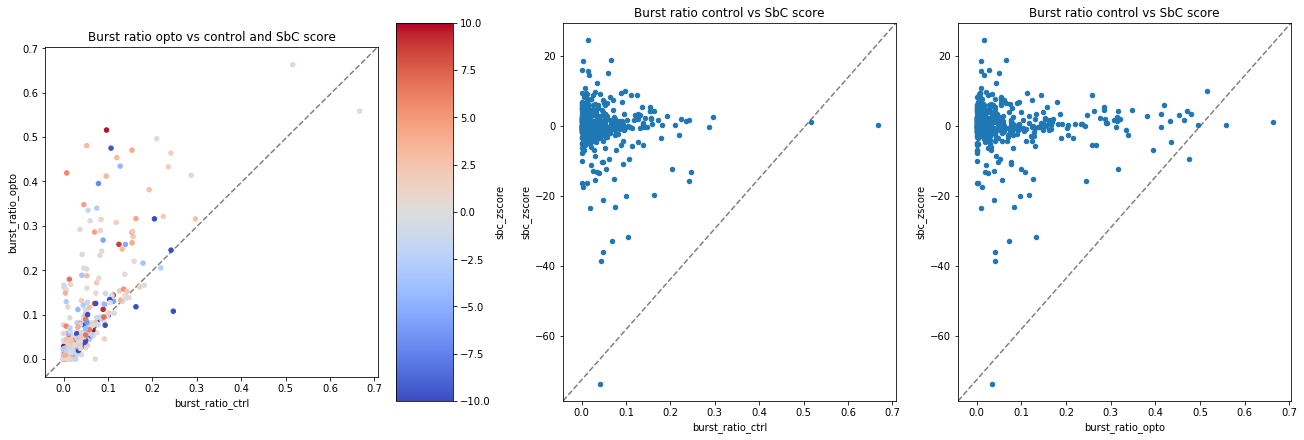

In [58]:
# Plot burst ratio opto vs control + SbC scores
fig, axs = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)
axs[0].set_aspect('equal')

vminmax = np.nanmax(np.absolute(df.sbc_zscore.values))  # too high at 76
vminmax = 10

df.plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='sbc_zscore', colormap='coolwarm', vmin=-vminmax, vmax=vminmax, ax=axs[0]);
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('Burst ratio opto vs control and SbC score')

df.plot.scatter(x='burst_ratio_ctrl', y='sbc_zscore', colormap='coolwarm', ax=axs[1]);
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('Burst ratio control vs SbC score')

df.plot.scatter(x='burst_ratio_opto', y='sbc_zscore', colormap='coolwarm', ax=axs[2]);
axs[2].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[2].transAxes, zorder=-1)
axs[2].set_title('Burst ratio control vs SbC score')

### Check burst ratio opto vs control grouped by stimulus type

In [61]:
np.unique(df['e_name'])

array(['AoriTun12_mov_compare_opto', 'AoriTun12_opto', 'AoriTun8_opto',
       'chirp_opto', 'conTun12_opto', 'conTun_opto', 'oriTun12_opto'],
      dtype=object)

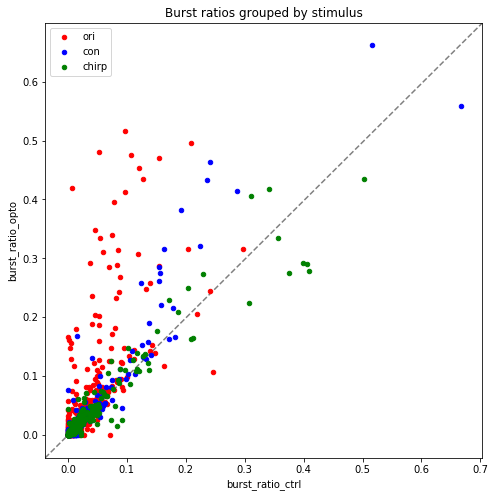

In [51]:
# Plot OSI/DSI opto vs control + SbC scores
fig, axs = plt.subplots(1,1, figsize=(8,8))
axs.set_aspect('equal')

# OSI
df[df.e_name.str.contains('ori')].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='r', ax=axs, label='ori');
df[df.e_name.str.contains('con')].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='b', ax=axs, label='con');
df[df.e_name.str.contains('chirp')].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='g', ax=axs, label='chirp');
axs.plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs.transAxes, zorder=-1)
axs.set_title('Burst ratios grouped by stimulus')

plt.legend();

### Check burst ratio against chirp type

In [52]:
chirp_df = unit_info[unit_info['chirp_type'].notna()][['m', 's', 'u', 'chirp_type']]
chirp_df

,m,s,u,chirp_type
40,Ntsr1Cre_2019_0002,3,13,ON-sust.
41,Ntsr1Cre_2019_0002,3,14,ON-OFF-trans.
42,Ntsr1Cre_2019_0002,3,19,mixed
43,Ntsr1Cre_2019_0002,3,30,ON-OFF-trans.
44,Ntsr1Cre_2019_0002,3,40,ON-OFF-trans.
...,...,...,...,...
2109,Ntsr1Cre_2020_0002,6,18,ON-OFF-trans.
2110,Ntsr1Cre_2020_0002,6,23,OFF-sust.
2111,Ntsr1Cre_2020_0002,6,26,mixed
2112,Ntsr1Cre_2020_0002,6,27,ON-sust.


In [53]:
# Merge chirp type info
df = df.merge(chirp_df, on=['m','s','u'], how='left')
df

,m,s,u,burst_ratio_ctrl,burst_ratio_opto,omi_stim,sbc_zscore,e_name,chirp_type
0,Ntsr1Cre_2019_0002,3,13,0.052185,0.187629,0.103517,3.288161,oriTun12_opto,ON-sust.
1,Ntsr1Cre_2019_0002,3,14,0.012205,0.053588,-0.086694,7.661878,oriTun12_opto,ON-OFF-trans.
2,Ntsr1Cre_2019_0002,3,19,0.000563,0.000000,0.192101,4.236185,oriTun12_opto,mixed
3,Ntsr1Cre_2019_0002,3,30,0.007001,0.419077,0.416186,5.810582,oriTun12_opto,ON-OFF-trans.
4,Ntsr1Cre_2019_0002,3,40,0.012940,0.179692,0.108434,6.814885,oriTun12_opto,ON-OFF-trans.
...,...,...,...,...,...,...,...,...,...
700,Ntsr1Cre_2020_0003,2,129,0.003704,0.019444,-0.262040,NaN,chirp_opto,NaN
701,Ntsr1Cre_2020_0003,2,141,0.050737,0.053215,0.013223,NaN,chirp_opto,NaN
702,Ntsr1Cre_2020_0003,2,142,0.011920,0.010674,0.094540,NaN,chirp_opto,NaN
703,Ntsr1Cre_2020_0003,2,144,0.017788,0.011672,-0.012856,NaN,chirp_opto,NaN


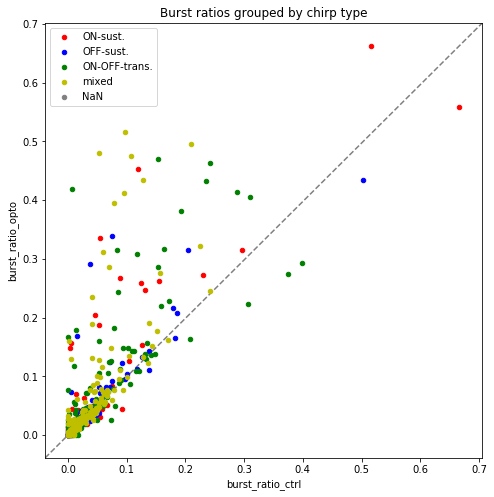

In [56]:
# Plot OSI/DSI opto vs control + SbC scores
fig, axs = plt.subplots(1,1, figsize=(8,8))
axs.set_aspect('equal')

# OSI
df[df['chirp_type']=='ON-sust.'].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='r', ax=axs, label='ON-sust.');
df[df['chirp_type']=='OFF-sust.'].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='b', ax=axs, label='OFF-sust.');
df[df['chirp_type']=='ON-OFF-trans.'].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='g', ax=axs, label='ON-OFF-trans.');
df[df['chirp_type']=='mixed'].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='y', ax=axs, label='mixed');
df[df['chirp_type']==np.nan].plot.scatter(x='burst_ratio_ctrl', y='burst_ratio_opto', c='grey', ax=axs, label='NaN');
axs.plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs.transAxes, zorder=-1)
axs.set_title('Burst ratios grouped by chirp type')

plt.legend();